In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime
from time import strftime
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
medical_data = pd.read_csv("Medappointments.csv")

In [3]:
medical_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
## converting the scheduled_date and appointment_date to data format from object data type 

medical_data['ScheduledDay'] = pd.to_datetime(medical_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
medical_data['AppointmentDay'] = pd.to_datetime(medical_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [6]:
medical_data[['ScheduledDay','AppointmentDay']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ScheduledDay    110527 non-null  datetime64[ns]
 1   AppointmentDay  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


In [7]:
medical_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
## setting day of the week for scheduled and appointment date to get a clear picture of days from monday to sunday
medical_data['scheduled_dayoftheweek'] = medical_data['ScheduledDay'].dt.dayofweek
medical_data['appointment_dayoftheweek'] = medical_data['AppointmentDay'].dt.dayofweek

In [9]:
medical_data[['scheduled_dayoftheweek' , 'appointment_dayoftheweek']].head()

,scheduled_dayoftheweek,appointment_dayoftheweek
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4


In [10]:
## values counts are generated to verify the trend of scheduled and appointment date throughout the week 
medical_data['scheduled_dayoftheweek'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: scheduled_dayoftheweek, dtype: int64

In [11]:
medical_data['appointment_dayoftheweek'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: appointment_dayoftheweek, dtype: int64

In [12]:
medical_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,scheduled_dayoftheweek,appointment_dayoftheweek
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


Text(0.5, 1.0, 'Count of PATIENTS actually visiting on the scheduled day')

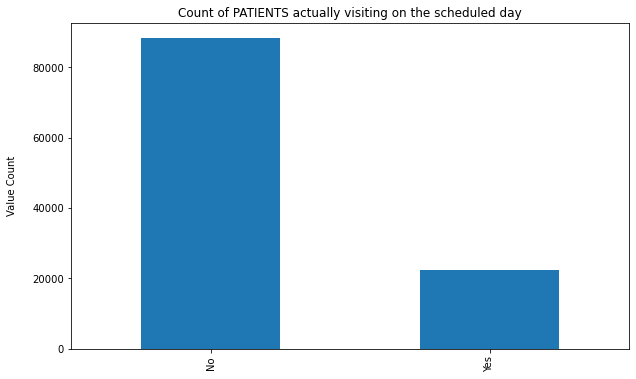

In [13]:
## plotting a bar graph to get a high level picture of pateints who scheduled the apointmentment and turned up on the specific day

medical_data['No-show'].value_counts().plot(kind='bar' , figsize=(10,6))
plt.ylabel("Value Count" ,labelpad=15)
plt.title("Count of PATIENTS actually visiting on the scheduled day")

In [14]:
# Seems like majority of appoitments are been not completed on the scheduled day
# calculating the % value to get an exact ratio

medical_data['No-show'].value_counts() / len(medical_data['No-show']) *100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

## Data Cleaning 

1 : Create a Copy of medical_data for cleaning and processing 

In [15]:
medical_data_copy = medical_data.copy()

In [16]:
medical_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PatientId                 110527 non-null  float64       
 1   AppointmentID             110527 non-null  int64         
 2   Gender                    110527 non-null  object        
 3   ScheduledDay              110527 non-null  datetime64[ns]
 4   AppointmentDay            110527 non-null  datetime64[ns]
 5   Age                       110527 non-null  int64         
 6   Neighbourhood             110527 non-null  object        
 7   Scholarship               110527 non-null  int64         
 8   Hipertension              110527 non-null  int64         
 9   Diabetes                  110527 non-null  int64         
 10  Alcoholism                110527 non-null  int64         
 11  Handcap                   110527 non-null  int64         
 12  SM

### Since there is no missing value Data cleaning is not required

In [17]:
medical_data_copy['Age']

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

In [18]:
medical_data_copy['Age'].max()

115

In [19]:
## We can create an bin for age and keep each of the ages in certain groups for easier manipulation in future 

labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]
medical_data['Age_group'] = pd.cut(medical_data.Age, range(1, 130, 20), right=False, labels=labels)

In [20]:
medical_data['Age_group']

0         61 - 81
1         41 - 61
2         61 - 81
3          1 - 21
4         41 - 61
           ...   
110522    41 - 61
110523    41 - 61
110524    21 - 41
110525    21 - 41
110526    41 - 61
Name: Age_group, Length: 110527, dtype: category
Categories (6, object): ['1 - 21' < '21 - 41' < '41 - 61' < '61 - 81' < '81 - 101' < '101 - 121']

In [21]:
## Drop Columns which are not required for Analysis ( making life a bit easier)

medical_data.drop(['PatientId' , 'AppointmentID' , 'Age' ,'Neighbourhood' ] , axis=1, inplace=True)

In [22]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Gender                    110527 non-null  object        
 1   ScheduledDay              110527 non-null  datetime64[ns]
 2   AppointmentDay            110527 non-null  datetime64[ns]
 3   Scholarship               110527 non-null  int64         
 4   Hipertension              110527 non-null  int64         
 5   Diabetes                  110527 non-null  int64         
 6   Alcoholism                110527 non-null  int64         
 7   Handcap                   110527 non-null  int64         
 8   SMS_received              110527 non-null  int64         
 9   No-show                   110527 non-null  object        
 10  scheduled_dayoftheweek    110527 non-null  int64         
 11  appointment_dayoftheweek  110527 non-null  int64         
 12  Ag

# Data Exploration

In [23]:
list(medical_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'scheduled_dayoftheweek',
 'appointment_dayoftheweek',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

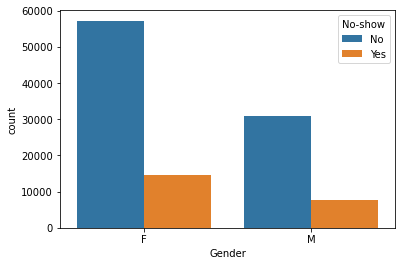

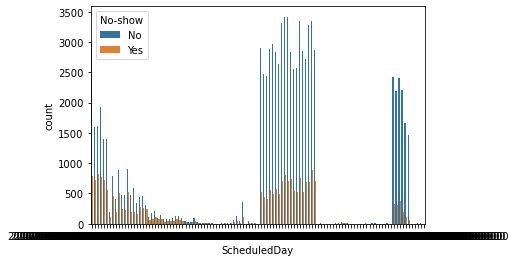

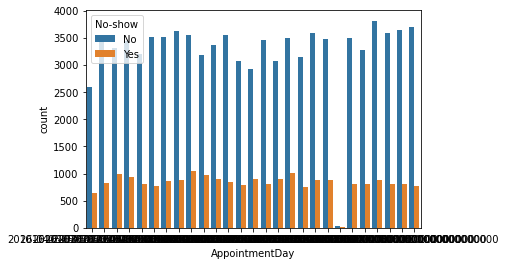

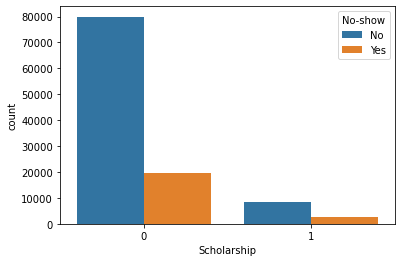

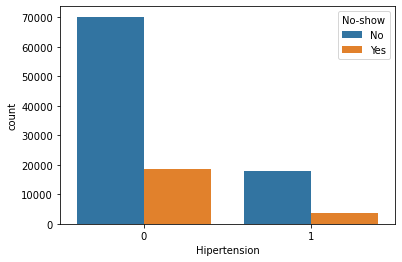

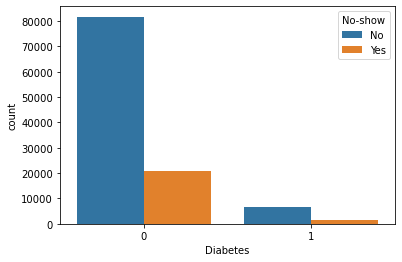

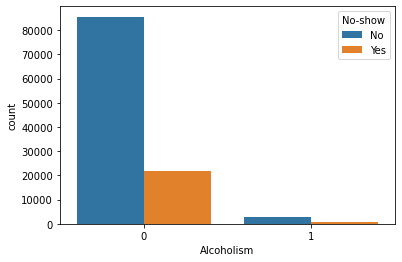

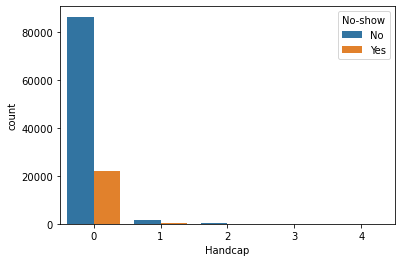

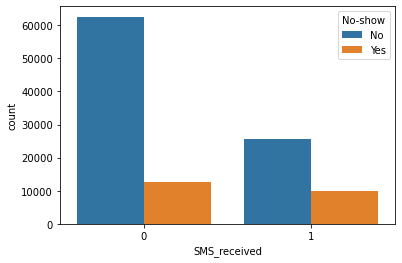

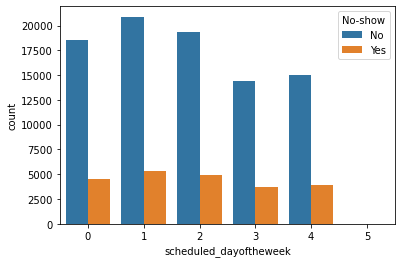

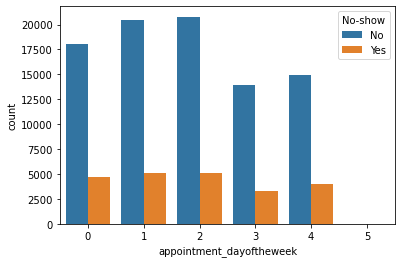

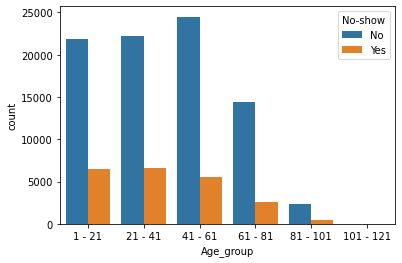

In [24]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(medical_data.drop(columns=['No-show'])):
    print('-'*10,predictor,'-'*10)
    print(medical_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=medical_data, x=predictor, hue='No-show')

In [25]:
medical_data['No-show'] = np.where(medical_data['No-show'] == 'Yes' , 1 , 0)

In [26]:
medical_data['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

#### To predict the co-relation between vlaues we need to convert our data to 1's and 0's this can be done by using dummy varaible

In [27]:
medical_data_dummies = pd.get_dummies(medical_data)
medical_data_dummies.head()

## creating dummy variable automatically drops the main column 

,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,scheduled_dayoftheweek,appointment_dayoftheweek,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


#### Building a co-relation within our No-show values to see which values are positively skewed

<AxesSubplot:>

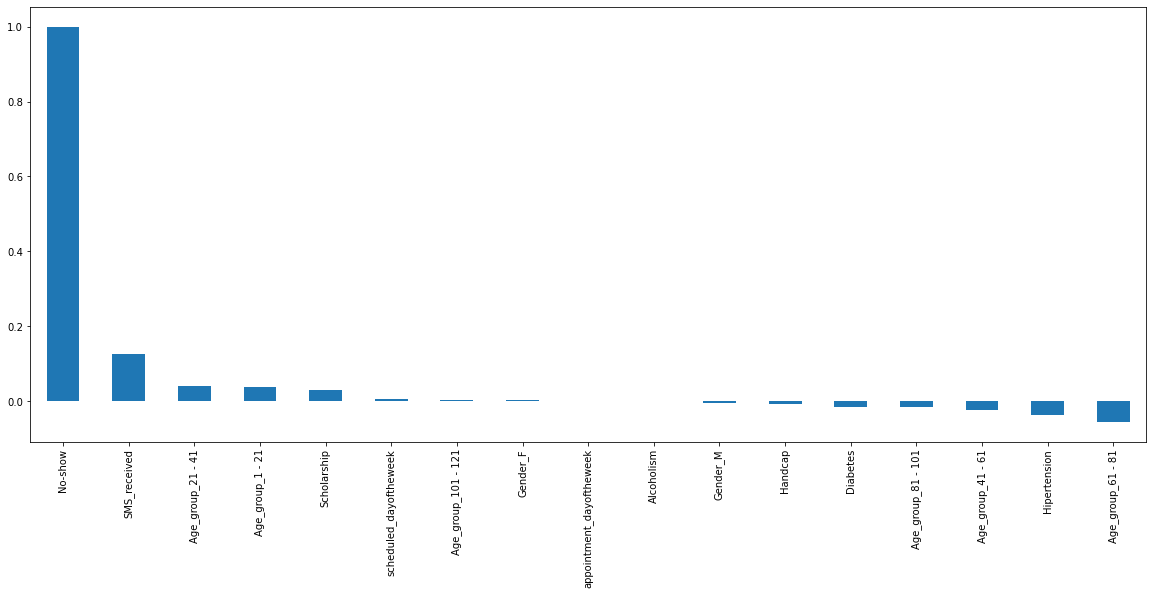

In [29]:
plt.figure(figsize=(20,8))
medical_data_dummies.corr()['No-show'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

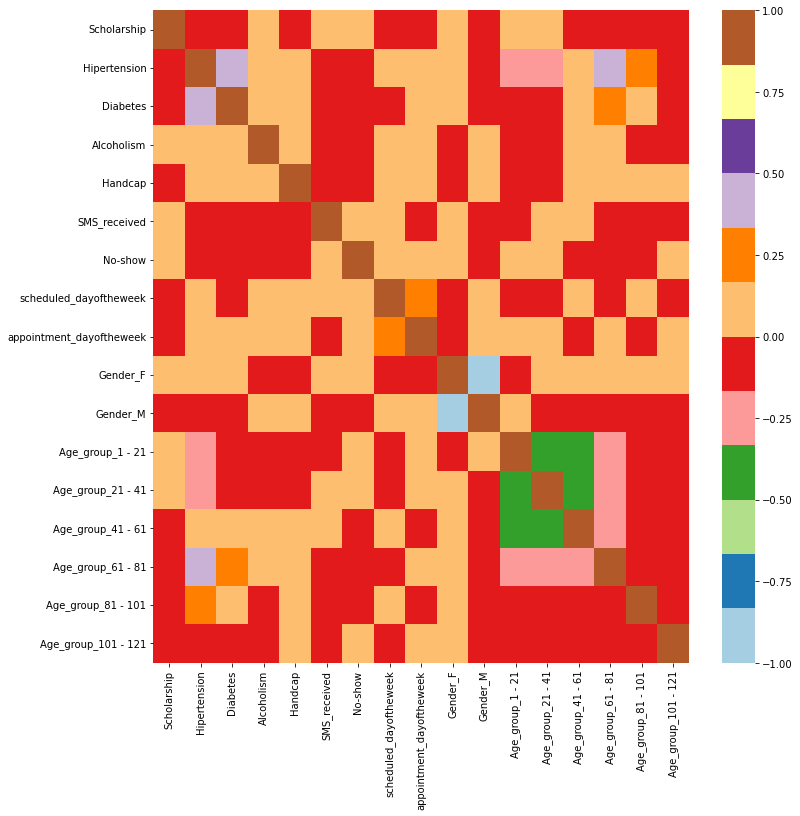

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(medical_data_dummies.corr(), cmap="Paired")

## Bivariate Analysis 

In [31]:
new_df1_target0=medical_data.loc[medical_data["No-show"]==0]
new_df1_target1=medical_data.loc[medical_data["No-show"]==1]

In [32]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

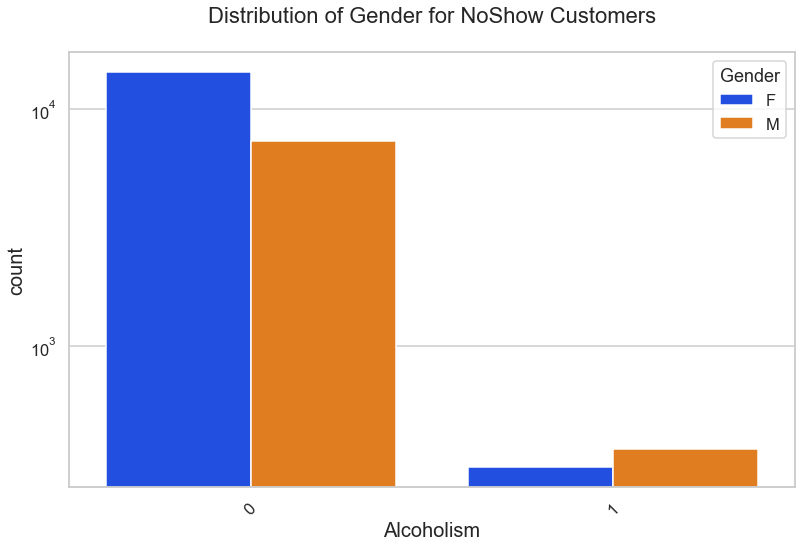

In [33]:
## No-show : 1 i.e. Patients who turned up for the appointment
uniplot(new_df1_target1,col='Alcoholism',title='Distribution of Gender for NoShow Customers',hue='Gender')

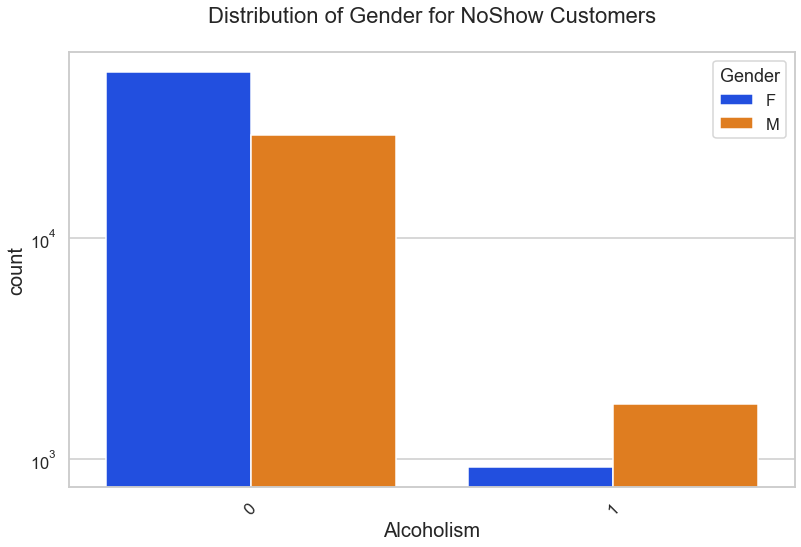

In [34]:
## ## No-show : 0 i.e. Patients who didnt turn up for the appointment
uniplot(new_df1_target0,col='Alcoholism',title='Distribution of Gender for NoShow Customers',hue='Gender')

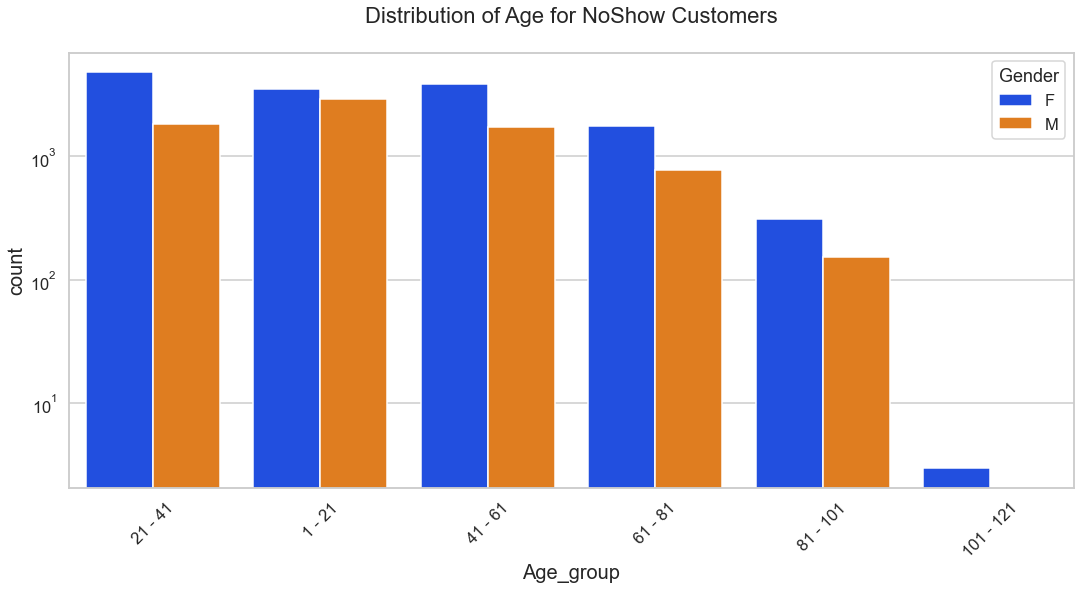

In [35]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

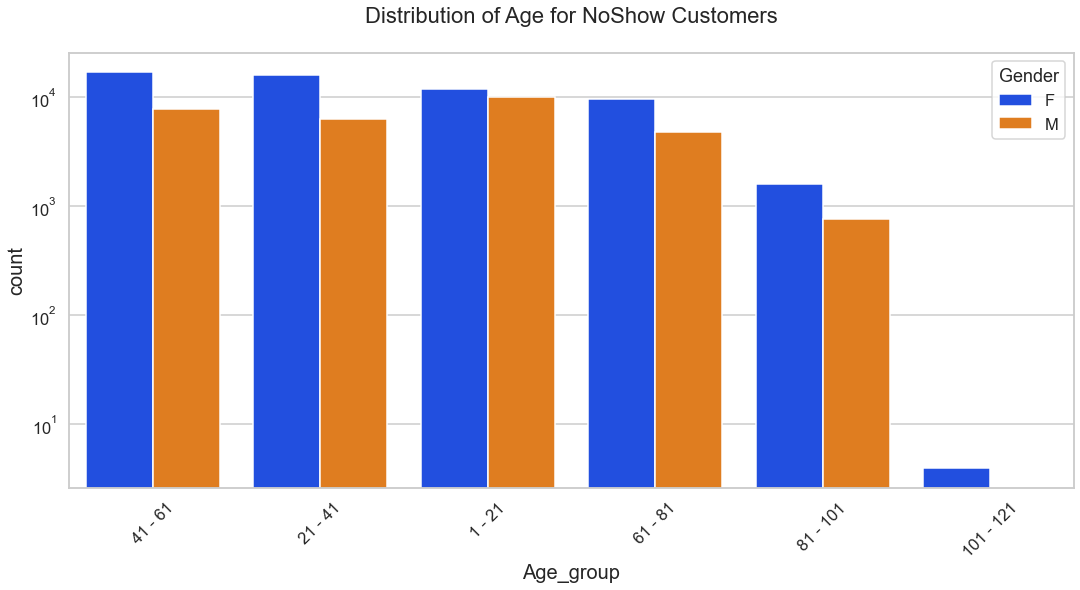

In [36]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

### Summary

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days